<!-- 
This Jupyter notebook is an almost-complete transcription of the article "Sentiment Analysis: First Steps With Python's NLTK Library" written by Marius Mogyorosi for RealPython. 

The article can be found at https://realpython.com/python-nltk-sentiment-analysis/ 


I have removed and/or altered some portions of the original article to better fit the context of a Jupyter notebook.
-->
# __Sentiment Analysis in Python using NLTK__

### <u>Introduction to NLTK</u>

NLTK (Natural Language ToolKit) is a Python library which contains a variety of utilities that allow you to effectively manipulate and analyze linguistic data. Among its advanced features are __text classifiers__ that you can use for many kinds of classification, including sentiment analysis.

__Sentiment analysis__ is the practice fo using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

After using <code>pip</code> to install the <code>nltk</code> library, execute the following code to download the corpora used in this notebook.

> <u>__Note</u>:__
> The word __corpus__ and its plural form, __corpora__ refer to large collections of related text samples. In the context of NLTK, corpora are compiled with features for [natural language processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing), such as categories and numerical scores for particular features.

In [ ]:
import nltk

nltk.download([
   "names",
   "stopwords",
   "state_union",
   "twitter_samples",
   "movie_reviews",
   "averaged_perceptron_tagger",
   "vader_lexicon",
   "punkt",
])

The corpora being used in this notebook are:

- __names__: A [list of common English names](https://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/) compiled by Mark Kantrowitz
- __stopwords__: A list of really common words, like articles, pronouns, prepositions and conjunctions
- __state_union__: A sample of transcribed [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses by different US presidentsm compiled by Kathleen Ahrens
- __twitter_samples__: A list of social media phrases posted to Twitter
- __movie_reviews__: [Two thousand movie reviews](https://www.cs.cornell.edu/people/pabo/movie-review-data/) categorized by Bo Pang and Lillian Lee
- __averaged_perceptron_tagger__: A data model that NLTK uses to categorize words into their [part of speech](https://en.wikipedia.org/wiki/Part_of_speech)
- __vader_lexicon__: A scored [list of words and jargon](https://github.com/cjhutto/vaderSentiment) that NLTK references when performing sentiment analysis, created by C.J. Hutto and Eric Gilbert
- __punkt__: A data model created by Jan Strunk that NLTK uses to split full texts into word lists.

To view all of the available corpora and pre-trained models, run <code>nltk.download()</code>.

If NLTK requires resources that you have yet to install, you'll see a <code>LookupError</code> with details and instructions to download the resource:

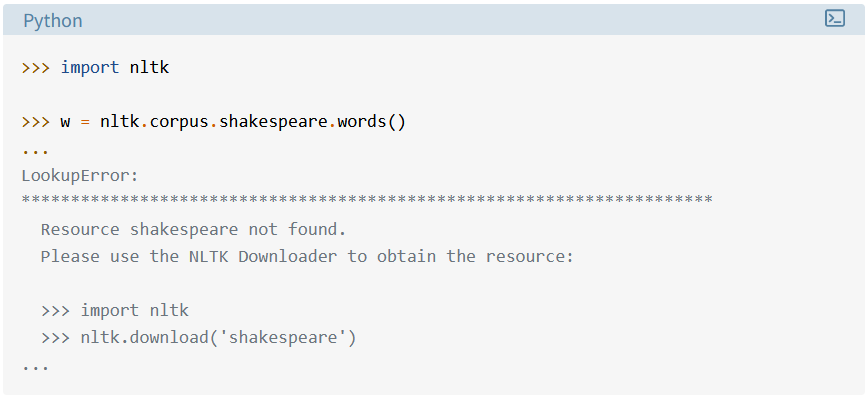



---
### <u>Compiling Data</u>

NLTK provides a number of functions that you can call with few or no arguments that will help you meaningfully analyze text before you even touch its machine learning capabilities. Many of NLTK's utilities are helpful in preparing your data for more advanced analysis.

Soon, you'll learn about frequency distributions, concordance, and collocations. But first, you need some data.

Start by loading the State of the Union corpus that was downloaded earlier:

In [ ]:
words = [word for word in nltk.corpus.state_union.words() if word.isalpha()]

# This is equivalent to:
# words = []
# for word in nltk.corpus.state_union.words():
#     if word.isalpha():
#         words.append(word)

Note that you build a list of individual words with the corpus's <code>.words()</code> method, but you use <code>str.isalpha()</code> to include only the words that are made up of letters. Otherwise, your words list may end up with "words" that are only punctuation marks.

Have a look at your list:

In [ ]:
from pprint import pprint   # pretty print

pprint(words[:25], compact=True)   # This is an extraordinarly long list, 
                                   # so we'll stick to 50 words here

You'll notice lots of little words like "of", "a", "the", and similar. These common words are called __stop words__, and they can have a negative effect on your analysis because they occur so often in the text. Thankfully, there's a convenient way to filter them out.

NLTK provides a small corpus of stop words that you can load into a list:

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

Make sure to specify <code>english</code> as the desired language since this corpus contains stop words in various languages.

Now, you can remove stop words from your original word list:

In [ ]:
words = [word for word in words if word.lower() not in stopwords]

pprint(words[:25], compact=True)

In [ ]:
# You can also remove stop words from the list on creation
words2 = [word for word in nltk.corpus.state_union.words() 
         if word.isalpha() and word.lower() not in stopwords]
print('\n')
pprint(words2[:25], compact=True)

print('\n', words == words2)

Since all words in the <code>stopwords</code> list are lowercase, and those in the original list may not be, you use <code>str.lower()</code> to account for any discrepancies. Otherwise, you may end up with mixedCase or capitalized stop words still in your list.

While the corpora used in this notebook are provided by NLTK, it's possible to build your own text corpora from any source. Building a corpus can be as simple as loading some plain text or as complex as labeling and categorizing each sentence. Refer to NLTK's documentation for more information on [how to work with corpus readers](https://www.nltk.org/howto/corpus.html).

For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve this goal. Beyond Python's own string manipulation methods, NLTK provides <code>nltk.word_tokenize()</code>, a function that splits raw text into individual words. While __tokenization__ is itself a bigger topic (and likely one of the steps you'll take when creating a custom corpus), this tokenizer delivers simple word lists really well.

To use it, call <code>word_tokenize()</code> with the raw text you want to split:

In [ ]:
text = "For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve this goal."

pprint(nltk.word_tokenize(text), compact=True)

Now you have a workable word list! Remember that punctuation will be counted as individual words, so use <code>str.isalpha()</code> to filter them out later.


---
### <u>Creating Frequency Distributions</u>

Now you're ready for __frequency distributions__. A frequency distribution is essentially a table that tells you how many times each word appears within a given text. In NLTK, frequency distributions are a specific object type implemented as a distinct class called <code>FreqDist</code>. This class provides useful operations for word frequency analysis.

To build a frequency distribution with NLTK, construct the <code>nltk.FreqDist</code> class with a word list:

In [ ]:
# Using the words list from above

fd = nltk.FreqDist(words)

This will create a frequency distribution object similar to a [Python dictionary](https://realpython.com/python-dicts/) but with added features.

After building the object, you can use methods list <code>.most_common()</code> and <code>.tabulate()</code> to start visualizing information:

In [ ]:
pprint(fd.most_common(8), compact=True)
print('\n')
fd.tabulate(8)

These methods allow you to quickly determine frequently used words in a sample. With <code>.most_common()</code>, you get a list of tuples containing each word and how many times it appears in your text. You can get the same information in a more readable form with <code>.tabulate()</code>.

In addition to these two methods, you can use frequency distributions to query particular words. You can also use them as iterators to perform some custom analysis on word properties.

For example, to discover differences in case, you can query for different variations of the same word:

In [ ]:
print(fd['America'])

print(fd['america'])   # Note this doesn't result in a KeyError

print(fd['AMERICA'])

These return values indicate the number of times each word occurs exactly as given.

Since frequency distribution objects are [iterable](https://realpython.com/python-for-loop/#iterables), you can use them within [list comprehenstions](https://realpython.com/list-comprehension-python/) to create subsets of the initial distribution. You can focus these subsets on properties that are useful for your own analysis.

Try creating a new frequency distribution that's based on the initial one but normalizes all words to lowercase:

In [ ]:
lower_fd = nltk.FreqDist([word.lower() for word in words])

lower_fd.tabulate(8)   # Note that some of the most common words have increased in frequency

Now you have a more accurate representation of word usage regardless of case.

NLTK provides many other ways to represent data from the frequency distribution:

In [ ]:
print(f'Unique words:\n {lower_fd.B()}')  # Number of unique words

print(f'Total words:\n {lower_fd.N()}')  # Total number of words

print(f'Fraction of words that are \'america\':\n {lower_fd.freq('america')}')  # Frequency (as a decimal) of a given word

lower_fd.plot(10)   # You may need to install the 'matplotlib' package first for this to work


---
### <u>Extracting Concordance and Collocations</u>

In the context of NLP, a __concordance__ is a collection of word locations along with their context. You can use concordances to find:
1. How many time a word appears
2. Where each occurrence appears
3. What words surround each occurrence

In NLTK, you can do this by calling <code>.concordance()</code>. To use it, you need an instance of the <code>nltk.Text</code> class, which can also be constructed with a word list.

Before invoking <code>.concordance()</code>, build a new word list from the original corpus text so that all the context, even stop words, will be there:

In [ ]:
text = nltk.Text(nltk.corpus.state_union.words())

text.concordance('america', lines=5)

Note that <code>.concordance()</code> already ignores case, allowing you to see the context of all case variants of a word in order of appearance. Note also that this function doesn't show you the location of each word in the text.

Additionally, since <code>.concordance()</code> only prints information to the console, it's not ideal for data manipulation. To obtain a usable list that will also give you information about the location of each occurrence, use <code>.concordance_list()</code>:

In [ ]:
concordance_list = text.concordance_list('america')

for i in range(5):
    print(concordance_list[i].line)

print('\n')

# Alternatively,
concordance_list = text.concordance_list('america', lines=5)

for entry in concordance_list:
    print(entry.line)

<code>.concordance_list()</code> gives you a list of <code>ConcordanceLine</code> objects, which contain information about where each word occurs as well as a few more properties worth exploring. The list is also sorted in order of appearance.

The <code>nltk.Text</code> class itself has a few other interesting features. One of them is <code>.vocab()</code>, which is worth mentioning because it creates a frequency distribution for a given text.

Revisiting <code>nltk.word_tokenize()</code>, check out how quickly you can create a custom <code>nltk.Text</code> instance and an accompanying frequency distribution:

In [ ]:
words: list[str] = nltk.word_tokenize("Beautiful is better than ugly. Explicit is better than implicit. Simple is better than complex.")

text = nltk.Text(words)
fd = text.vocab()  # This is equivalent to nltk.FreqDist(words)
fd.tabulate(3)

<code>.vocab()</code> is essentially a shortcut to create a frequency distribution from an instance of <code>nltk.Text</code>. That way, you don't have to make a separate call to instantiate a new <code>nltk.FreqDist</code> object.

Another powerful feature of NLTK is its ability to quickly find __collocations__ with simple function calls. Collocations are series of words that frequently appear together in a given text. In the State of the Union corpus, for example, you'd expect to find the words _United_ and _States_ appearing next to each other very often. Those two words appearing together is a collocation.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:
- __Bigrams:__ Frequent two-word combinations
- __Trigrams:__ Frequent three-word combinations
- __Quadgrams:__ Frequent for-word combinations

NLTK provides specific classes for you to find collocations in your text. Following the pattern you've seen so far, these classes are also built from lists of words:

In [ ]:
words = [word for word in nltk.corpus.state_union.words() if word.isalpha()]

finder = nltk.collocations.TrigramCollocationFinder.from_words(words)

The <code>TrigramCollocationFinder</code> instance will search specifically for trigrams. As you may have guessed, NLTK also has the <code>BigramCollocationFinder</code> and <code>QuadgramCollocationFinder</code> classes for bigrams and quadgrams, respectively. All these classes have a number of utilities to give you information about all identified collocations.

One of their most useful tools is the <code>ngram_fd</code> property. This property holds a frequency distribution that is built for each collocation rather than for individual words.

Using <code>ngram_fd</code>, you can find the most common collocations in the supplied text:

In [ ]:
pprint(finder.ngram_fd.most_common(5))

finder.ngram_fd.tabulate(2)

You don't even have to create the frequency distribution, as it's already a property of the collocation finder instance.


---
##  <u>Using NLTK's Pre-Trained Sentiment Analyzer</u>

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It's less accurate when rating longer, structured sentences, but it's often a good launching point.

To use VADER, first create an instance of <code>nltk.sentiment.SentimentIntensityAnalyzer</code>, then use <code>.polarity_scores()</code> on a raw string:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('Wow, NLTK is really powerful!')

You'll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can't be negative. The compound score is calculated differently. It's not just an average, and it can range from -1 to 1.

Now you'll put it to the test against real data using two different corpora. First, load to <code>twitter_samples</code> corpus into a list of strings, making a replacement to render URLs inactive to avoid accidental clicks:

In [ ]:
tweets = [tweet.replace('://', '//') for tweet in nltk.corpus.twitter_samples.strings()]

Notice that you use a different corpus method, <code>.strings()</code>, instead of <code>.words()</code>. This gives you a list of raw tweets as strings.

Different corpora have different features, so you may need to use Python's <code>help()</code>, as in <code>help(nltk.corpus.tweet_samples)</code>, or consult NLTK's documentation to learn how to use a given corpus.

Now use the <code>.polarity_scores()</code> function of your <code>SentimentIntensityAnalyzer</code> instance to classify tweets:

In [ ]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise"""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)

In this case, <code>is_positive()</code> uses only the positivity of the compound score to make the call. You can choose any combination of VADER scores to tweak the classification to your needs.

Now take a look at the second corpus, <code>movie_reviews</code>. As the name implies, this is a collection of movie reviews. The special thing about this corpus is that it's already been classified. Therefore, you can use it to judge the accuracy of the algorithms you choose when rating similar texts.

Keep in mind that VADER is likely better at rating tweets than it is at rating long movie reviews. To get better results, you'll set up VADER to rate individual sentences within the review rather than the entire text.

Since VADER needs raw strings for its rating, you can't use <code>.words()</code> like you did earlier. Instead, make a list of the file IDs that the corpus uses, which you can use later to reference individual reviews:

In [ ]:
positive_review_ids = nltk.corpus.movie_reviews.fileids(categories=["pos"])
negative_review_ids = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids + negative_review_ids

<code>.fileids()</code> exists in most, if not all, corpora. In the case of <code>movie_reviews</code>, each file corresponds to a single review. Note also that you're able to filter the list of file IDs by specifyinng categories. This categorization is a feature specific to this corpus and others of the same type.

Next, redefine <code>is_positive()</code> to work on an entire review. You'll need to obtain that specific review using its file ID and then split it into sentences before rating:

In [ ]:
from statistics import mean

def is_positive(review_id: str) -> bool:
    """True if the average of all sentence compound scores is positive"""
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [
        sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)
    ]
    return mean(scores) > 0

<code>.raw()</code> is another method that exists in most corpora. By specifying a file ID or a list of file IDs, you can obtain specific data from the corpus. Here, you get a single review, then use <code>nltk.sent_tokenize()</code> to obtain a list of sentences from the review. Finally, <code>is_positive()</code> calculates the average compound score for all sentences and associates a positive result with a positive review.

You can take the opportunity to rate all the reviews and see how accurate VADER is with this setup:

In [ ]:
shuffle(all_review_ids)
correct = 0
for review_id in all_review_ids:
    if is_positive(review_id):
        if review_id in positive_review_ids:
            correct += 1
    else:
        if review_id in negative_review_ids:
            correct += 1

print(f'{correct / len(all_review_ids):.2%} correct')

After rating all reviews, you can see that only 64 percent were correctly classified by VADER using the logic defined in <code>is_positive()</code>.

Have a little fun tweaking <code>is_positive()</code> to see if you can increase the accuracy.


---
## <u>Customizing NLTK's Sentiment Analysis</u>

NLTK offers a few built-in classifiers that are suitable for various types of analyses, including sentiment analysis. The trick is to figure out which properties of your dataset are useful in classifying each piece of data into you desired categories.

In the world of machine learning, these data properties are known as __features__, which you must reveal and select as you work with your data. While this notebook won't dive too deeply into [feature selection](https://en.wikipedia.org/wiki/Feature_selection) and [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), you'll be able to see their effects on the accuracy of classifiers.

### Selecting Useful Features

Since you've learned how to use frequency distributions, why not use them as a launching point for an additional feature?

By using the predefined categories in the <code>movie_reviews</code> corpus, you can create sets of positive and negative words, then determine which ones occur most frequently across each set. Begin by excluding unwanted words and building the initial category groups:

In [24]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted, 
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted, 
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

This time, you also add words from the <code>names</code> corpus to the <code>unwanted</code> list on line 2 since movie reviews are likely to have lots of actor names, whch shouldn't be part of the feature sets. Notice <code>pos_tag()</code> on lines 14 and 18, which tags words by their part of speech.

It's important to call <code>pos_tag()</code> _before_ filtering your word lists so that NLTK can more accurately tag all words. <code>skip_unwanted()</code>, defined on line 4, then uses those tags to exclude nouns, according to NLTK's [default tag set](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

Now you're ready to create the frequency distributions for your custom feature. Since many words are present in both positive and negative sets, begin by finding the common set so you can remove it from the distribution objects:

In [25]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

Once you're left with unique positive and negative words in each frequency distribution object, you can finally build sets from the most common words in each distribution. The amount of words in each set is something you could tweak in order to determine its effect on sentiment analysis.

This is one example of a feature you can extract from your data, and it's far from perfect. Looking closely at these sets, you'll notice some uncommon names and words that aren't necessarily positive or negative. Additionally, the other NLTK tools you've learned so far can be useful for building more features. One possibility is to leverage collocations that carry positive meaning, like the bigram "thumbs up!"

Here's how to set up the positive and negative bigram finders:

In [26]:
positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    word for word in nltk.corpus.movie_reviews.words(categories=["pos"])
    if word.isalpha() and word not in unwanted
])

negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    word for word in nltk.corpus.movie_reviews.words(categories=["neg"])
    if word.isalpha() and word not in unwanted
])

Try different combinations of features, think of ways to use the negative VADER scores, create ratios, polish the frequency distributions. The possibilities are endless!

### Training and Using a Classifier

With your new feature set ready to use, the first prerequisite for training a classifier is to define a function that will extract features from a given piece of data.

Since you're looking for positive movie reviews, focus on the features that indicate positivity, including VADER scores:

In [27]:
def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Add 1 to the final compound score to always have positive numbers
    # since some classifiers used later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features

<code>extract_features()</code> should return a dictionary, and it will create three features for each piece of text:
1. The average compound score
2. The average positive score
3. The amount of words in the text that are also part of the top 100 words in all positive reviews

In order to train and evaluate a classifier, you'll need to build a list of features for each text you'll analyze:

In [28]:
features = [
   (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
   for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
   (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
   for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

Each item in this list of features needs to be a tuple whose first item is the dictionary returned by <code>extract_features</code> and whose second item is the predefined category for the text. After initially training the classifier with some data that has already been categorized (such as the <code>movie_reviews</code> corpus), you'll be able to classify new data.

Training the classifier involves splitting the feature set so that one portion can be used for training and the other for evaluation, then calling <code>.train()</code>:

In [29]:
# Using 1/4 of the set for training
train_count = len(features) // 4
shuffle(features)

classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

nltk.classify.accuracy(classifier, features[train_count:])

Most Informative Features
               wordcount = 2                 pos : neg    =      3.0 : 1.0
               wordcount = 4                 pos : neg    =      2.2 : 1.0
               wordcount = 0                 neg : pos    =      1.8 : 1.0
               wordcount = 1                 pos : neg    =      1.6 : 1.0
           mean_positive = 0.09305263157894737    neg : pos    =      1.0 : 1.0


0.654

Since you're shuffling the feature list, each run will give you different results. In fact, it's important to shuffle the list to avoid accidentally grouping similarly classified reviews in the first quarter of the list.

Adding a single feature has marginally improved VADER's initial accuracy, from 64 percent to 67 percent. More features could help, as long as they truly indicate how positive a review is. You can use <code>classifier.show_most_informative_features()</code> to determine which features are most indicative of a specific property.

To classify new data, find a movie review somewhere and pass it to <code>classifier.classify()</code>. You can also use <code>extract_features()</code> to tell you exactly how it was scored:

In [30]:
# Review source: https://www.rogerebert.com/reviews/

new_good_review = "Ilker Çatak's \"The Teacher's Lounge\" is glorious. It's probably the best thriller of this type since \"Uncut Gems,\" another movie where just watching realistic characters making bad decisions was so nerve-wracking that it made you want to crawl under your seat. I don't know if it quite earns the somewhat muted, art cinema-styled, \"It's up to you to decide what happens next\" ending that it ultimately gives us; but that's a tiny fraction of the movie's compact running time, which otherwise puts us in the headspace of a young teacher at a German secondary school where an outbreak of stealing has made everyone paranoid and edgy, leading them to make choices they're going to regret later, if they have a shred of decency (some of them may not)."

good_feats = extract_features(new_good_review)
pprint(good_feats)
print(classifier.classify(good_feats))

print('\n')
new_bad_review = "\"Migration,\" sadly, is so bereft of any real point of interest for any viewer over the age of 8, that it almost makes “Dawn of the Nugget” look like Miyazaki's latest film by comparison. How bereft, you may wonder? So bereft that I plan to avoid using any bird-related comments that I suspect will accompany other reviews on the basis that even those critiques, as hackneyed as they may be, demonstrate greater flashes of wit and ingenuity than anything on display here."

bad_feats = extract_features(new_bad_review)
pprint(bad_feats)
print(classifier.classify(bad_feats))

{'mean_compound': 1.0239, 'mean_positive': 0.19433333333333333, 'wordcount': 1}
pos


{'mean_compound': 1.0585333333333333,
 'mean_positive': 0.06533333333333334,
 'wordcount': 0}
neg


Was it correct? Based on the scoring output from <code>extract_features()</code>, what can be improved?

Feature engineering is a big part of improving the accuracy of a given algorithm, but it's not the whole story. Another strategy is to use and compare different classifiers.


---
## <u>Comparing Additional Classifiers</u>

NLTK provides a class that can use most classifiers from the popular machine learning framework [scikit-learn](https://scikit-learn.org/stable/).

Many of the classifiers that scikit-learn provides can be instantiated quickly since they have defaults that often work well. In this section, you'll learn how to integrate them within NLTK to classify linguistic data.

### Installing and Importing scikit-learn

Like NLTK, scikit-learn is a third-party Python library, so you'll have to install it with <code>pip install scikit-learn</code>.

After installing scikit-learn, you'll be able to use its classifiers directly with NLTK.

The following classifiers are a subset of all classifiers available to you. These will work within NLTK for sentiment analysis:

In [31]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

With these classifiers imported, you'll first have to instantiate each one. Thankfully, all of these have pretty good defaults and don't require much tweaking.

To aid in accuracy evaluation, it's helpful to have a mapping of classifier names and their instances:

In [32]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

Now you can use these instances for training and accuracy evaluation.

### Using scikit-learn Classifiers With NLTK

Since NLTK allows you to integrate scikit-learn classifiers directly into its own classifier class, the training and classification processes will use the same methods you've already seen, <code>.train()</code> and <code>.classify()</code>.

You'll also be able to leverage the same <code>features</code> list you built earlier by means of <code>extract_features()</code>. As a refresher, here is how the list was built:

In [33]:
features = [
   (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
   for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
   (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
   for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

The <code>features</code> list contains tuples whose first item is a set of features given by <code>extract_features()</code>, and whose second item is the classification label from preclassified data in the <code>movie_reviews</code> corpus.

Since the first half of the list contains only positive reviews, begin by shuffling it, then iterate over all classifiers to train and evaluate each one:

In [34]:
# Use 1/4 of the set for training

train_count = len(features) // 4
shuffle(features)
for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifier, features[train_count:])
    print(f'{accuracy:.2%} - {name}')

65.73% - BernoulliNB
64.93% - ComplementNB
65.20% - MultinomialNB
69.53% - KNeighborsClassifier
63.20% - DecisionTreeClassifier
69.67% - RandomForestClassifier
72.40% - MLPClassifier
71.73% - AdaBoostClassifier


For each scikit-learn classifier, call <code>nltk.classify.SklearnClassifier</code> to create a usable NLTK classifier that can be trained and evaluated exactly like you've seen before with <code>nltk.NaiveBayesClassifier</code> and its other built-n classifiers. The <code>.train()</code> and <code>.accuracy()</code> methods should receive different portions of the same list of features.